<img id="intro" src="img/slide1.svg"/>
<script>

$(document).ready(function(){
    setTimeout(fix,1000); //wait a little bit anyway then run
    });


function fix(){
    //Reveal.configure({height:"100%"});
    //Reveal.configure({width:"100%"});
    //Reveal.configure({margin:0});
    //Reveal.configure({minScale:1});
    //Reveal.configure({maxScale:3.0});
    $(".prompt").remove();
    //Reveal.configure({parallaxBackgroundImage:"img/slide1.svg"});
    
    Reveal.configure({controls: false});
    Reveal.configure({progress: false});
    
};

</script>

# The Joy of Integer Programming
### Solving hard combinatorial problems in python

<hr>
### Charles C. Ochoa

### slides: [http://bit.ly/pycseoul](http://bit.ly/pycseoul)



<hr>

<img src="img/pyconlogo-03.png" align="left"/>

# Hard problems:

* Traveling Salesman
* What is the optimal route for a delivery vehicle to travel to minimize distance?
* How to assign tasks to workers to maximize productivity?
* What is the best ordering of pycon talks?
* Where should a new warehouse be opened?
* Which employees should be grouped together for a project?


# Math Programming?

<img src="img/math.gif" align="center"/>



## basically:  [<b style="color:red">최적화</b>] "optimization"

$$minimize\: f(x)\\subject\, to\: g(x) < 0 $$


# [<b style="color:red">선형 프로그램</b>] Linear Programs?

A linear program is one where the metric or objective to minimize is linear and the constraints are linear, i.e.:

$$f(x) = a_{0}x_{0} + a_{1}x_{1}+ \dots + a_{n}x_{n}$$


### linear:
$$f(x) = 3x + 2y$$


### not linear:
$$f(x) = 3x*y+15$$


# [<b style="color:red">정수</b>] Integer Programs?

Problems where the variables are <b>integers</b> ie, 0,1,2,3,... and the negatives.

# Very mature field

* Very mature topic in operations research
* Industrial engineers 
* Computer science
* Mathematics


# Lots of tools and languages exist

|Name|License|Info|
|---|---|---|
|ADMB|	BSD|	nonlinear optimization framework, using automatic differentiation|
|ALGLIB|	GPL|	nonlinear analysis library, optionally using automatic differentiation. Cross-language: C++, C#, Pascal, VBA.|
|ASCEND|	GPL|	mathematical modelling system|
|BOBYQA|	LGPL|	An algorithm that seeks the least value of a nonlinear function subject to bound constraints, without using derivatives of the objective function.|
|COBYLA|	LGPL|	An algorithm that seeks the least value of a nonlinear function subject to nonlinear inequality constraints, without using derivatives of the objective function or the constraints.|
|COIN-OR SYMPHONY|	Eclipse v.1|	integer programming|
|CUTEr|	GPL|	testing environment for optimization and linear algebra solvers|
|dlib|	Boost|	A stand-alone C++ library with a variety of linear and non-linear solvers for small and large scale problems|
|GLPK|	GPL|	GNU Linear Programming Kit|

^ small sample (source: [wikipedia](https://en.wikipedia.org/wiki/List_of_optimization_software)), the full list is much much longer



<center><img src="img/python_basic.png"/></center>

## Python PuLP package for linear mixed integer program modeling

```bash 
pip install pulp
```

# basic example 
$$minimize\: f(x,y,z)=5x+10y+6z \\
subject\, to\\
x+y+z \geq 20 \\
0\leq x,y,z \leq 10 
$$


### 1. Setup the problem

In [89]:
from pulp import *

prob = LpProblem("Hello!",LpMinimize)

### 2. Setup the variables: 

In [90]:
x = LpVariable('x',lowBound=0, upBound=10, cat='Continuous')
y = LpVariable('y',lowBound=0, upBound=10, cat='Continuous')
z = LpVariable('z',lowBound=0, upBound=10, cat='Continuous')

### 3. Setup the objective and constraints

In [91]:
#the objective
prob+= 5*x+10*y+6*z

In [92]:
#the constraint
prob+= x + y + z >= 20

### summary

In [93]:
print(prob)

Hello!:
MINIMIZE
5*x + 10*y + 6*z + 0
SUBJECT TO
_C1: x + y + z >= 20

VARIABLES
x <= 10 Continuous
y <= 10 Continuous
z <= 10 Continuous



### Solve it!

In [94]:
prob.solve()
print('status:',LpStatus[prob.status])
print('objective:', value(prob.objective))

status: Optimal
objective: 110.0


In [95]:
for v in prob.variables():
    print(v, v.varValue)

x 10.0
y 0.0
z 10.0


# Knapsack Problem

How many items of different weights can we fit in our backpack before it is too heavy. Which objects should we take?

<center><img src="img/knapsack.svg"/></center>


^ image source: [wikipedia](https://commons.wikimedia.org/wiki/File:Knapsack.svg)

$$x_i = \begin{cases}
    1, & \text{if item i is added to our backpack} \\
    0, & \text{otherwise}
\end{cases}
$$

The objective: Maximize total Value
<br>
$$\text{Maximize} \ \sum_{i} x_i*value_i$$


make sure we don't carry too much weight
<br>
$$\sum_{i} x_i*w_i \leq W$$


### First lets make some fake data

In [96]:
import numpy as np

items=['item_%d'%i for i in range(50)]
item_weights = dict( (i,np.random.randint(1,50)) for i in items)
item_values = dict( (i,np.random.randint(1,100)) for i in items)

#target weight
W = 100

In [97]:
#create the problem
prob=LpProblem("knapsack",LpMaximize)

#variables
x = LpVariable.dicts('item',items,0,1, LpBinary)

#the objective
prob+= lpSum([ item_values[i]*x[i] for i in items])

#constraint
prob += lpSum([ item_weights[i]*x[i] for i in items]) <= W

### Results

In [98]:
prob.solve()
print(LpStatus[prob.status])

#and the results
for i in items:
    if value(x[i]) > 0:
        print('%s: \tweight: %i\tvalue: %i'%(i, item_weights[i], item_values[i]))
        
total_weight = np.sum([ item_weights[i]*value(x[i]) for i in items])
print('Total: \t\tweight: %i\tvalue: %i'%(total_weight, value(prob.objective)) )

Optimal
item_16: 	weight: 9	value: 65
item_17: 	weight: 7	value: 86
item_19: 	weight: 14	value: 71
item_24: 	weight: 5	value: 70
item_31: 	weight: 16	value: 74
item_36: 	weight: 14	value: 45
item_38: 	weight: 5	value: 92
item_43: 	weight: 11	value: 61
item_47: 	weight: 9	value: 77
item_48: 	weight: 10	value: 92
Total: 		weight: 100	value: 733


# Traveling salesman

What is the optimal route to take to visit several locations?

<img src="img/no_subtour.png" align="center"/>


$$x_{i,j} = \begin{cases}
    1, & \text{if site i comes exactly before j in the tour} \\
    0, & \text{otherwise}
\end{cases}
$$

$$\text{for all i,j combinations except where i = j}$$

objective: minimize the total tour distance:
<br>
$$f(x) = \sum_{i,j \space i \neq j} x_{i,j} Distance(i,j)$$

such that: each site is visited exactly once:

ie, there is exactly one way to enter a give site j
<br>
$$\sum_{i \neq j} x_{i,j} = 1 \space \text{for all j}$$

and only one way of exiting a site j
<br>
$$\sum_{j \neq i} x_{i,j} = 1 \space \text{for all i} $$

## This almost works, but there is a problem...

### Subtours:

we might end up with this:

<center><img src="img/subtour.png" style="height:300px"/></center>

if we find a subtour, explicitly eliminate it
$$\sum_{j \neq i} x_{i,j} = 1 \space \text{where i is in the subtour and j is not} $$ 


In [99]:
#note this code is hidden in the slides because it is not very interesting
import matplotlib.pyplot as plt
import seaborn as sn
import networkx as nx
%matplotlib inline

import warnings; warnings.simplefilter('ignore')

def draw_data(sites,positions):
    G = nx.Graph()
    G.add_nodes_from(sites)
    nx.draw(G, pos=positions, node_size=40, node_color='orange', with_labels=False)

### Make some fake data

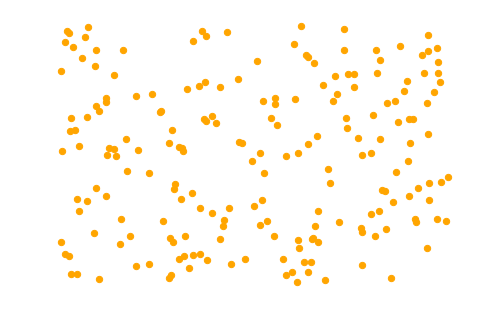

In [104]:
np.random.seed(42)

#make some sites
NUM_SITES = 200
sites = range(NUM_SITES)

#make up some location for them
positions = dict( ( a, (np.random.rand()-.5, np.random.rand()-.5)) for a in sites)

#straight line distance for simplicity
d = lambda p1,p2: np.sqrt( (p1[0]-p2[0])**2+ (p1[1]-p2[1])**2)

#calculate all the distance pairs
distances=dict( ((s1,s2), d(positions[s1],positions[s2])) for s1 in positions for s2 in positions if s1!=s2)

draw_data(sites,positions)

### Create the problem

In [105]:
prob=LpProblem("salesman",LpMinimize)

#variables: 1 if site i is connected to site j in the tour else 0
x = LpVariable.dicts('x',distances, 0,1,LpBinary)

#the objective
prob += lpSum([x[(i,j)]*distances[(i,j)] for (i,j) in distances])

#constraints
for k in sites:
    #inbound connection
    prob+= lpSum([ x[(i,k)] for i in sites if i!=k ]) ==1
    #outbound connection
    prob+= lpSum([ x[(k,i)] for i in sites if i!=k ]) ==1

### Solve and eliminate subtours until finished

In [106]:
subtours = sites
while(len(subtours) > 1):
    print('solving... ',end='')
    
    status = prob.solve()
    
    if status != 1:
        print('failed')
        break
    
    #check for cycles
    non_zero_edges = [ k for k in distances if x[k].varValue >0]
    G = nx.DiGraph(non_zero_edges)
    subtours = list(nx.simple_cycles(G))
    print('contains %i subtours'%len(subtours))
    
    #add the constraints to break these specific subtours
    for sub in subtours:
        prob+=lpSum([x[(a,b)] for a in sub for b in set(sites) - set(sub)]) >=1
    
print('done!',LpStatus[prob.status])

solving... contains 94 subtours
solving... contains 23 subtours
solving... contains 14 subtours
solving... contains 18 subtours
solving... contains 10 subtours
solving... contains 6 subtours
solving... contains 3 subtours
solving... contains 3 subtours
solving... contains 1 subtours
done! Optimal


### Result!

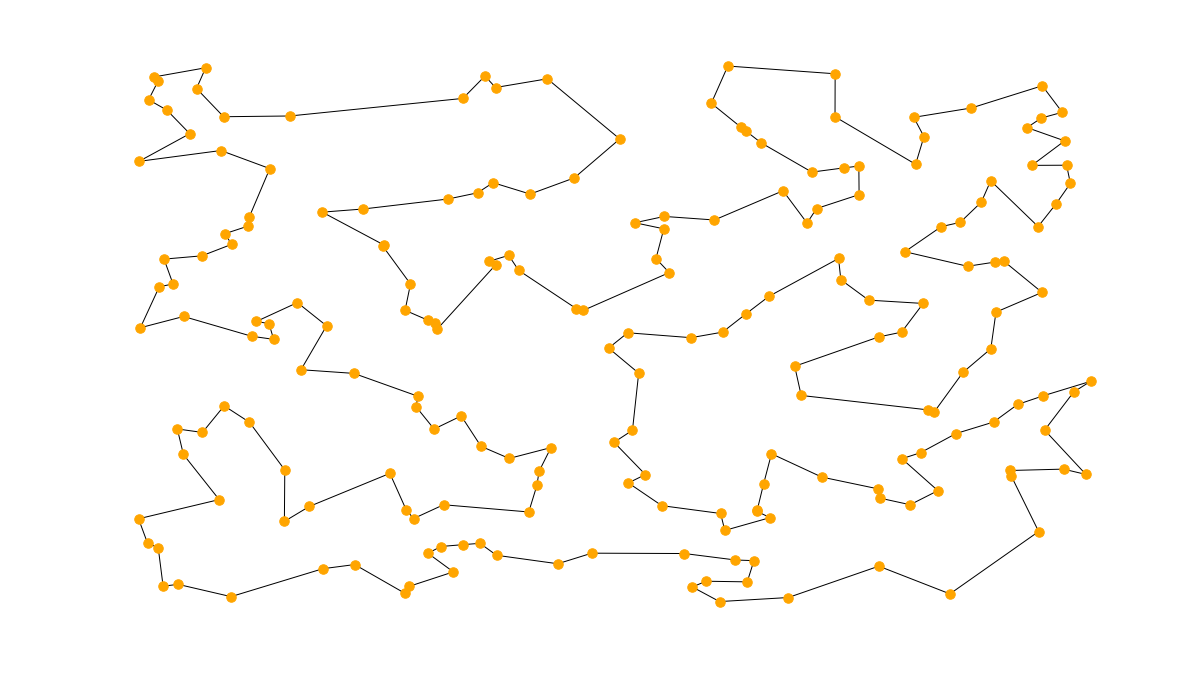

In [107]:
plt.figure(figsize=(16,9))
nx.draw(G.to_undirected(), pos=positions,node_size=90,node_color='orange')

# Binary variables are awesome

### we can model basic logical operations (x,y binary)
 
|logical operation|new binary variable|
|---|---|
|not x	|$z = 1-x$|
|x or y|$ z \geq x \\z \geq y \\z \leq x+y$|
|x and y|$ z \leq x \\z \leq y \\z \geq x+y - 1$|
|$ x\implies y $|$y \geq x$|

### we can model optional enforcement of constraints, this is called the "Big M method"
### "Either this constraint holds or this one holds (or both)"

#### need two constraints
if $b=1$ then $F(x) \geq 0$

if $b=0$ then $G(x) \geq 0$

#### also a big number that bounds the constraints
Find a bound $M$ such that $|F| \leq M$ and $|G| \leq M$. 

#### use this!
$$F(x) \geq -M(1-b) \\
G(x) \geq -M(b)$$

### example
$$ x \geq 10 \\ \text{or}\\ x \leq 20$$
$|x| \leq 100$ so set $M=1000$



#### result:
$$x \geq 10 - M(1-b) \\
x \leq 20 + M(b)$$

### we can model non-linear functions! (kinda)

#### approximate a non linear function with a piecewise linear approximation


<img src="img/piecewise.png"/>


# So how does this work anyway?

How can we be sure the result is optimal if we haven't checked all the possible solutions?

<img src="img/confused_nick.png"/>



# Solving linear equations with continous variables is very fast

# Integer $\subset$ Continuous

so the optimal solution for the integer problem cannot be "better" than the solution of the same problem solved continously

# Branch and Bound algorithm

Use the bounds obtained from the relaxed solutions to prune nodes in a recursive search of the possible solution space

<img src="img/binary_tree.png" align="right"/>


# the not joyful parts

* Debugging: 
    - Check all assumptions, make sure problem is solveable before trying to solve it
* Form matters:
    - The way you model the problem has a direct and sometimes dramatic influence on the running time
* Hard to know what is hard:
    - Some problems finish in seconds, others may take hours
    

* Long running times:
    - accept a result within a certain percentage of the optimal bound
    ```python
    prob.solve(PULP_CBC_CMD(threads=8,msg=1,options=["ratio 0.05"])) 
    ```
    - add more constraints (add cuts)
    - try other methods

# Thanks :)




<p>Charles (Chris) Ochoa 
<br> <a href="mailto:cochoa0x1@gmail.com">cochoa0x1@gmail.com</a>
<br>Chief Data Scientist, Logrank Analytics
</p>
### slides: [http://bit.ly/pycseoul](http://bit.ly/pycseoul)


<img src="img/logrank_logo.png" align="right"/>